In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math


In [57]:
# General CORDIC Implementation (Polar, Linear, Hyper)
N = 32     # How many iterations

In [58]:
# Make ROMs
ROM_polar = []
ROM_linear = []
ROM_hyper = []

An_polar = 1
for i in range(N):
    An_polar = An_polar*math.sqrt(1+2**(-2*i))
Kn_polar = 1/An_polar 

for i in range(N):
    ROM_polar.append(math.degrees(math.atan(2**(-1*i)))) # No question, this should be degree mode
    ROM_linear.append(2**(-1*i))
    # Blows up when i = 0
    if i!=0:
        ROM_hyper.append(math.atanh(2**(-1*i)))
    

In [67]:
# The binary CORDIC rotation table
for line in ROM_polar:
    binary = int(line*(2**(N-1)))>>5
    print('\'b{:032b}'.format(binary))

'b10110100000000000000000000000000
'b01101010010000101001110011000110
'b00111000001001010001110100000001
'b00011100100000000000010001001001
'b00001110010011100010101010011001
'b00000111001010001101111001010011
'b00000011100101001010100001101010
'b00000001110010100101101101011110
'b00000000111001010010111010010100
'b00000000011100101001011101100110
'b00000000001110010100101110110111
'b00000000000111001010010111011011
'b00000000000011100101001011101110
'b00000000000001110010100101110111
'b00000000000000111001010010111011
'b00000000000000011100101001011101
'b00000000000000001110010100101110
'b00000000000000000111001010010111
'b00000000000000000011100101001011
'b00000000000000000001110010100101
'b00000000000000000000111001010010
'b00000000000000000000011100101001
'b00000000000000000000001110010100
'b00000000000000000000000111001010
'b00000000000000000000000011100101
'b00000000000000000000000001110010
'b00000000000000000000000000111001
'b00000000000000000000000000011100
'b000000000000000000

In [68]:
Kn_polar


Kn_polar_binary = int(Kn_polar*(2**(N-1)))>>5
print('\'b{:032b}'.format(Kn_polar_binary))

'b00000010011011011101001110110110


In [85]:


deg = int(90*(2**(N-1)))>>5
print('\'b{:032b}'.format(deg))

'b101101000000000000000000000000000


In [49]:
# Do polar first

# Debug Only
x_list = []
y_list = []
z_list = []
i_list = []

mode = 'linear'


i  = 0
di = 0
x = 0.2
y = 0.1
z = 0.15
for i in range(N):
    # Decide direction
    if z < 0:
        di = -1
    else:
        di = +1
    if mode == 'linear':
        zn = z - di * ROM_linear[i]     # CORDIC ROM, the only difference between polar mode & linear mode
    elif mode == 'polar':
        zn = z - di * ROM_polar[i]      # CORDIC ROM, the only difference between polar mode & linear mode
    xn = x - di * y * (2**(-1*i)) # Shifter
    yn = y + di * x * (2**(-1*i)) # Shifter

    x = xn
    y = yn
    z = zn
    
    z_list.append(z)
    x_list.append(x)
    y_list.append(y)
    i_list.append(i)

print('Terminal: X=',x,', Y=',y, ' Z=',z)



Terminal: X= 0.33299860151020494 , Y= 0.15717155829380428  Z= 6.1035156250222045e-06


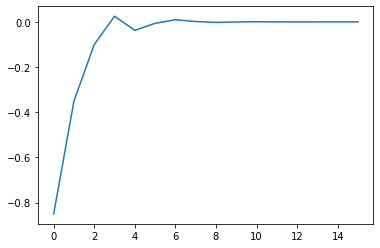

In [52]:
plt.plot(i_list, z_list)